In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import pickle
import datetime

In [3]:
def create_dataframe(path):
    df=pd.read_csv(path)
    return df

In [6]:
train_df=create_dataframe("E:/Analytics Vidhya/train.csv")
test_df=create_dataframe("E:/Analytics Vidhya/test.csv")

In [7]:
print(train_df.shape)
print(test_df.shape)

(233154, 41)
(112392, 40)


In [8]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [35]:
def calculate_age(born):
    date,month,year = born.strip().split('-')
    current_year = datetime.datetime.now()
    age = 2019 - int(year)
    return age

In [37]:
df=train_df.copy()

In [43]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [45]:
now = pd.Timestamp(datetime.datetime.now())
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format='%d-%m-%y')    # 1
df['Date.of.Birth'] = df['Date.of.Birth'].where(df['Date.of.Birth'] < now, df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['Date.of.Birth']).astype('<m8[Y]')    # 3

0    35.0
1    33.0
2    33.0
3    25.0
4    41.0
Name: age, dtype: float64


In [167]:
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'], format='%d-%m-%y')    # 1
test_df['Date.of.Birth'] = test_df['Date.of.Birth'].where(test_df['Date.of.Birth'] < now, test_df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))   # 2
test_df['age'] = (now - test_df['Date.of.Birth']).astype('<m8[Y]')    # 3F

In [47]:
df.drop('Date.of.Birth', axis=1, inplace=True)

In [168]:
test_df.drop('Date.of.Birth', axis=1, inplace=True)

In [118]:
#drop DisbursalDate  
df.drop('DisbursalDate', axis=1, inplace=True)

In [169]:
test_df.drop('DisbursalDate', axis=1, inplace=True)

In [51]:
df.set_index('UniqueID',inplace=True)

In [170]:
test_df.set_index('UniqueID',inplace=True)

In [58]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [59]:
missing_data(df)

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,State_ID,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
Total,0,0,0,0,0,0,0,7661,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,3.28581,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,float64,int64,int64,int64,int64,object,object,int64,...,int64,int64,int64,int64,int64,object,object,int64,int64,float64


In [60]:
missing_data(test_df)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
Total,0,0,0,0,0,0,0,0,0,3443,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,3.06339,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,float64,int64,int64,int64,int64,object,object,...,int64,int64,int64,int64,int64,int64,int64,object,object,int64


In [72]:
df['Employment.Type'].fillna('Nan', inplace=True)

In [171]:
test_df['Employment.Type'].fillna('Nan', inplace=True)

In [73]:
df['Employment.Type'].unique()

array(['Salaried', 'Self employed', 'Nan'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Employment.Type"] = labelencoder.fit_transform(df["Employment.Type"])

In [172]:
test_df["Employment.Type"] = labelencoder.fit_transform(test_df["Employment.Type"])

In [116]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [117]:
df["PERFORM_CNS.SCORE.DESCRIPTION"] = labelencoder.fit_transform(df["PERFORM_CNS.SCORE.DESCRIPTION"])

In [173]:
test_df["PERFORM_CNS.SCORE.DESCRIPTION"] = labelencoder.fit_transform(test_df["PERFORM_CNS.SCORE.DESCRIPTION"])

In [55]:
df.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,34.552682
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,9.830617
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,18.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,26.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,33.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,41.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,69.000000


In [100]:
import re
def extractmonth(input): 
    numbers = re.findall('\d+',input) 
    #numbers = map(int,numbers) 
    x = int(numbers[0])*12
    months = x+int(numbers[1])
    return months
    

In [102]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(extractmonth)

In [174]:
test_df['AVERAGE.ACCT.AGE'] = test_df['AVERAGE.ACCT.AGE'].apply(extractmonth)

In [106]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(extractmonth)

In [175]:
test_df['CREDIT.HISTORY.LENGTH'] = test_df['CREDIT.HISTORY.LENGTH'].apply(extractmonth)

In [113]:
cat_var = ['branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID']
for elem in cat_var:
    df[elem].astype('category')

In [176]:
for elem in cat_var:
    test_df[elem].astype('category')

In [177]:
test_df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,age
UniqueID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,1,6,1998,...,0,0,0,0,0,0,0,0,0,45.0
723482,55513,63163,89.45,67,22807,45,1497,2,6,1998,...,0,0,5605,0,1,0,8,12,1,33.0
758529,65282,84320,79.93,78,23135,86,2071,1,4,1646,...,0,0,0,0,0,0,0,0,0,23.0
763449,46905,63896,76.58,78,17014,45,2070,2,4,1646,...,0,0,0,0,0,0,29,29,0,45.0
708663,51428,63896,86.08,78,17014,45,2069,1,4,1646,...,0,0,0,0,0,0,0,0,0,46.0


In [178]:
test_df.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int32
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION            int32
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.B

In [120]:
features = [c for c in df.columns if c not in ['loan_default']]
target = train_df['loan_default']

In [179]:
features_test=test_df[features]

In [147]:
features_train=df[features]

In [149]:
type(features_train)

pandas.core.frame.DataFrame

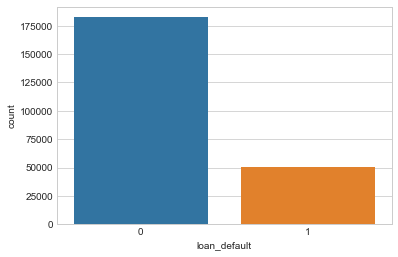

In [122]:
#the distribution of target value in train dataset.

sns.countplot(train_df['loan_default'])


In [123]:
%%time
correlations = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

Wall time: 1.43 s


In [124]:
correlations

,level_0,level_1,0
0,PERFORM_CNS.SCORE.DESCRIPTION,disbursed_amount,0.000016
1,disbursed_amount,PERFORM_CNS.SCORE.DESCRIPTION,0.000016
2,Employee_code_ID,PRI.OVERDUE.ACCTS,0.000116
3,PRI.OVERDUE.ACCTS,Employee_code_ID,0.000116
4,PAN_flag,SEC.INSTAL.AMT,0.000219
5,SEC.INSTAL.AMT,PAN_flag,0.000219
6,Employment.Type,SEC.ACTIVE.ACCTS,0.000275
7,SEC.ACTIVE.ACCTS,Employment.Type,0.000275
8,AVERAGE.ACCT.AGE,Employee_code_ID,0.000297
9,Employee_code_ID,AVERAGE.ACCT.AGE,0.000297


In [125]:
df.corr()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
disbursed_amount,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.041106,-0.023956,0.010120,...,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.004205,0.013402,0.038513,0.077675,-0.060987
asset_cost,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,0.015449,-0.026348,0.008711,...,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.015614,-0.023563,-0.017301,0.014261,-0.117762
ltv,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,-0.077431,0.004882,0.004940,...,0.008733,0.007358,0.000481,0.083824,0.041921,0.029853,0.053607,0.085725,0.098208,0.078613
branch_id,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,-0.010865,0.187782,0.088764,...,0.002457,0.004955,0.004265,-0.008354,-0.001730,0.005338,-0.002577,-0.001813,0.030193,-0.002932
supplier_id,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.080914,0.105502,0.095792,...,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.034095,-0.061370,-0.030988,0.027357,-0.031622
manufacturer_id,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,-0.026248,0.026412,-0.045009,...,0.003301,0.014116,0.003020,0.050079,0.019438,0.042522,0.061534,0.010012,-0.025039,0.053867
Current_pincode_ID,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.150706,0.047903,-0.042609,...,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.062704,-0.095906,-0.058821,0.028419,-0.064966
Employment.Type,-0.041106,0.015449,-0.077431,-0.010865,0.080914,-0.026248,0.150706,1.000000,-0.054752,0.037087,...,0.001179,0.009282,-0.004238,0.005380,0.014894,0.019889,0.011302,0.010080,0.025377,0.173302
State_ID,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,-0.054752,1.000000,0.117309,...,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.008205,-0.014526,-0.016129,0.048075,0.023340
Employee_code_ID,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.037087,0.117309,1.000000,...,-0.002224,0.013470,0.001894,0.005473,0.003624,0.000297,0.002189,-0.002108,0.020657,0.012519


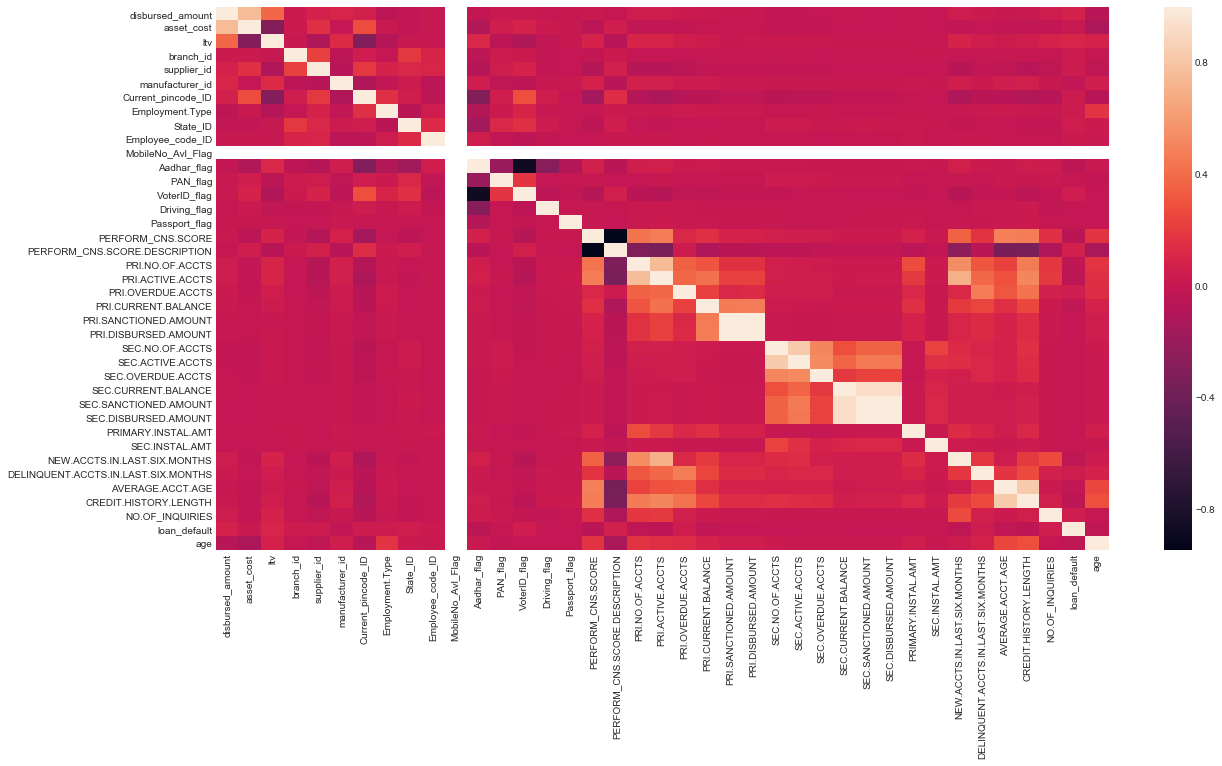

In [132]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [135]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [137]:
so[so>0.5]

age                                  age                                    1.000000
PRI.ACTIVE.ACCTS                     PRI.ACTIVE.ACCTS                       1.000000
PRI.CURRENT.BALANCE                  PRI.CURRENT.BALANCE                    1.000000
PRI.SANCTIONED.AMOUNT                PRI.SANCTIONED.AMOUNT                  1.000000
PRI.DISBURSED.AMOUNT                 PRI.DISBURSED.AMOUNT                   1.000000
SEC.NO.OF.ACCTS                      SEC.NO.OF.ACCTS                        1.000000
SEC.ACTIVE.ACCTS                     SEC.ACTIVE.ACCTS                       1.000000
SEC.OVERDUE.ACCTS                    SEC.OVERDUE.ACCTS                      1.000000
SEC.CURRENT.BALANCE                  SEC.CURRENT.BALANCE                    1.000000
SEC.SANCTIONED.AMOUNT                SEC.SANCTIONED.AMOUNT                  1.000000
SEC.DISBURSED.AMOUNT                 SEC.DISBURSED.AMOUNT                   1.000000
PRIMARY.INSTAL.AMT                   PRIMARY.INSTAL.AMT          

In [150]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(features_train, target, test_size=0.2, random_state=42)


C:\Users\Anto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [156]:
from sklearn.metrics import roc_auc_score
pred = lr.predict(Xtest)
#fpr, tpr, thresholds = metrics.roc_curve(ytest, pred)
roc_auc_score(ytest, pred)

0.5000218271429697

In [157]:
import lightgbm

In [158]:
train_data = lightgbm.Dataset(Xtest, label=ytest)


In [165]:
param = {
        'num_leaves': 30,
        'learning_rate': 0.1,
        'min_split_gain': 0.0431,
        'feature_fraction': 1,
        'max_depth': 20,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'metric': 'auc',
    }


In [166]:
    #trn_data = lightgbm.Dataset(Xtrain, label=ytrain)
    val_data = lightgbm.Dataset(Xtest, label=ytest)
    #trn_data_scaled = lightgbm.Dataset(train_scaled, label=ytrain)
    #val_data_scaled = lightgbm.Dataset(test_scaled, label=ytest)
model = lightgbm.train(param, train_data, valid_sets = [train_data, val_data], verbose_eval=1000, early_stopping_rounds = 100,
                       num_boost_round=32000)

Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.970449	valid_1's auc: 0.970449
[2000]	training's auc: 0.996729	valid_1's auc: 0.996729
Early stopping, best iteration is:
[2640]	training's auc: 0.99909	valid_1's auc: 0.99909


In [180]:
data=lightgbm.Dataset(features_train, label=target)
model_out = lightgbm.train(param, data, num_boost_round=2640)

In [181]:
LGBM_model = pickle.dumps(model_out)

In [182]:
output = model_out.predict(features_test)

In [183]:
output

array([0.24727078, 0.18979239, 0.25995075, ..., 0.69976463, 0.52975535,
       0.14856345])

In [187]:
ind=test_df.index.values
sol=pd.DataFrame({'UniqueID':ind,'loan_default':output},columns=['UniqueID','loan_default'])
sol.to_csv(r'E:/Analytics Vidhya/sol4.csv',index=False)

In [45]:
y=[]
for i in range(0,200000):
    if output[i]>=.5:       # setting threshold to .5
       y.append(1)
    else:  
       y.append(0)

In [ ]:
import collections
collections.Counter(y)